In [2]:
import pandas as pd
df = pd.read_csv("../data/processed/health_checkup_processed.csv")

In [3]:
df.shape, df.columns

((662623, 29),
 Index(['성별코드', '연령대코드(5세단위)', '신장(5cm단위)', '체중(5kg단위)', '허리둘레', '시력(좌)',
        '시력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드',
        'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)',
        '혈청지피티(ALT)', '감마지티피', '흡연상태', '음주여부', 'bmi', 'alt_ast_ratio',
        'tg_hdl_ratio', 'ggtp_alt_ratio', 'ldl_hdl_ratio', 'pulse_pressure',
        'hypertension_status'],
       dtype='object'))

In [4]:
df.describe()

,성별코드,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),...,감마지티피,흡연상태,음주여부,bmi,alt_ast_ratio,tg_hdl_ratio,ggtp_alt_ratio,ldl_hdl_ratio,pulse_pressure,hypertension_status
count,662623.000000,662623.000000,662623.000000,662623.000000,662623.000000,662623.000000,662623.000000,662623.000000,662623.000000,662623.00000,...,662623.000000,662623.000000,662623.000000,662623.000000,662623.000000,662623.000000,662623.000000,662623.000000,662623.000000,662623.000000
mean,1.454465,11.341686,162.374955,64.440919,82.251432,0.937076,0.936682,124.488241,76.111680,101.69042,...,35.337201,1.557792,0.616764,24.293999,0.961357,2.403021,1.416130,2.139834,48.376561,0.162220
std,0.497923,2.838014,9.661329,13.528826,10.100082,0.607910,0.606560,14.603383,10.153111,21.47955,...,40.654700,0.790164,0.486175,3.784789,0.380749,1.740195,1.307039,0.877969,10.673794,0.368653
min,1.000000,5.000000,130.000000,30.000000,7.600000,0.100000,0.100000,80.000000,40.000000,50.00000,...,1.000000,1.000000,0.000000,9.795918,0.010753,0.170940,0.010000,0.082645,5.000000,0.000000
25%,1.000000,9.000000,155.000000,55.000000,75.000000,0.700000,0.700000,115.000000,70.000000,90.00000,...,16.000000,1.000000,0.000000,21.484375,0.708333,1.190476,0.789474,1.492537,40.000000,0.000000
50%,1.000000,11.000000,160.000000,65.000000,82.000000,0.900000,0.900000,123.000000,76.000000,97.00000,...,23.000000,1.000000,1.000000,23.875115,0.888889,1.891304,1.100000,2.018519,48.000000,0.000000
75%,2.000000,13.000000,170.000000,75.000000,89.000000,1.200000,1.200000,134.000000,82.000000,107.00000,...,38.000000,2.000000,1.000000,26.234568,1.136364,3.065574,1.600000,2.660377,54.000000,0.000000
max,2.000000,18.000000,195.000000,135.000000,167.700000,9.900000,9.900000,242.000000,150.000000,300.00000,...,700.000000,3.000000,1.000000,56.191467,35.000000,36.272727,148.333333,13.166667,149.000000,1.000000


# 데이터 시각화 및 통계 분석

In [5]:
df['hypertension_status'].value_counts()

hypertension_status
0    555132
1    107491
Name: count, dtype: int64

| 값   | 의미    | 샘플 수    | 비율          |
| --- | ----- | ------- | ----------- |
| `0` | 정상 혈압 | 555,132 | 약 **83.8%** |
| `1` | 고혈압   | 107,491 | 약 **16.2%** |

| 관점         | 전략                                                                       |
| ---------- | ------------------------------------------------------------------------ |
| 분류 모델 선택 시 | `accuracy`만 보면 안 됨 → 고혈압(1)을 무시해도 정확도 높게 나옴                           |
| 평가 지표      | `precision`, `recall`, `F1-score`, **AUC-ROC** 등을 반드시 봐야 함               |
| 학습 데이터     | 언더샘플링/오버샘플링 고려 →  **SMOTE**, ADASYN, 또는 **XGBoost 내 class\_weight 조정** |

타겟 분포 확인 결과, 전체 데이터 중 약 16.2%가 고혈압 환자로 분류되며,  
이는 분류 모델 학습 시 클래스 불균형 문제를 고려해야 함을 시사 
정확도 외에도 정밀도(Precision), 재현율(Recall), AUC 등 다양한 평가지표와  
샘플링 전략 또는 가중치 보정이 함께 사용 필요

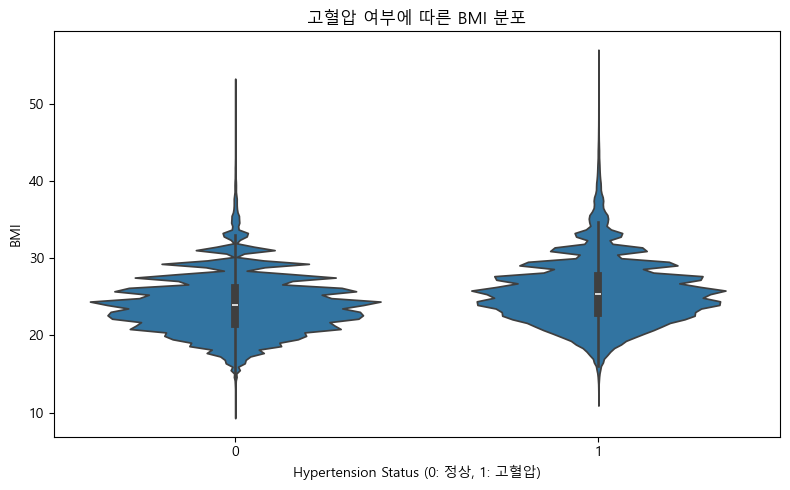

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (Windows의 경우)
plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우: 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False      # 마이너스 기호 깨짐 방지

plt.figure(figsize=(8, 5))
sns.violinplot(x='hypertension_status', y='bmi', data=df, inner='box')
plt.title("고혈압 여부에 따른 BMI 분포")
plt.xlabel("Hypertension Status (0: 정상, 1: 고혈압)")
plt.ylabel("BMI")
plt.tight_layout()
plt.show()

Violinplot을 통해 BMI 분포를 시각화한 결과,  
고혈압자는 정상자에 비해 BMI의 전체 분포가 우측으로 이동해 있으며,  
과체중~비만(BMI 27~30) 구간에 밀도 집중이 뚜렷하게 나타난다.  
이는 BMI가 고혈압 발생과 밀접한 관련이 있음을 시사하며,  
고도비만(BMI > 35)에서의 꼬리 확장은 고위험군 특성으로 해석

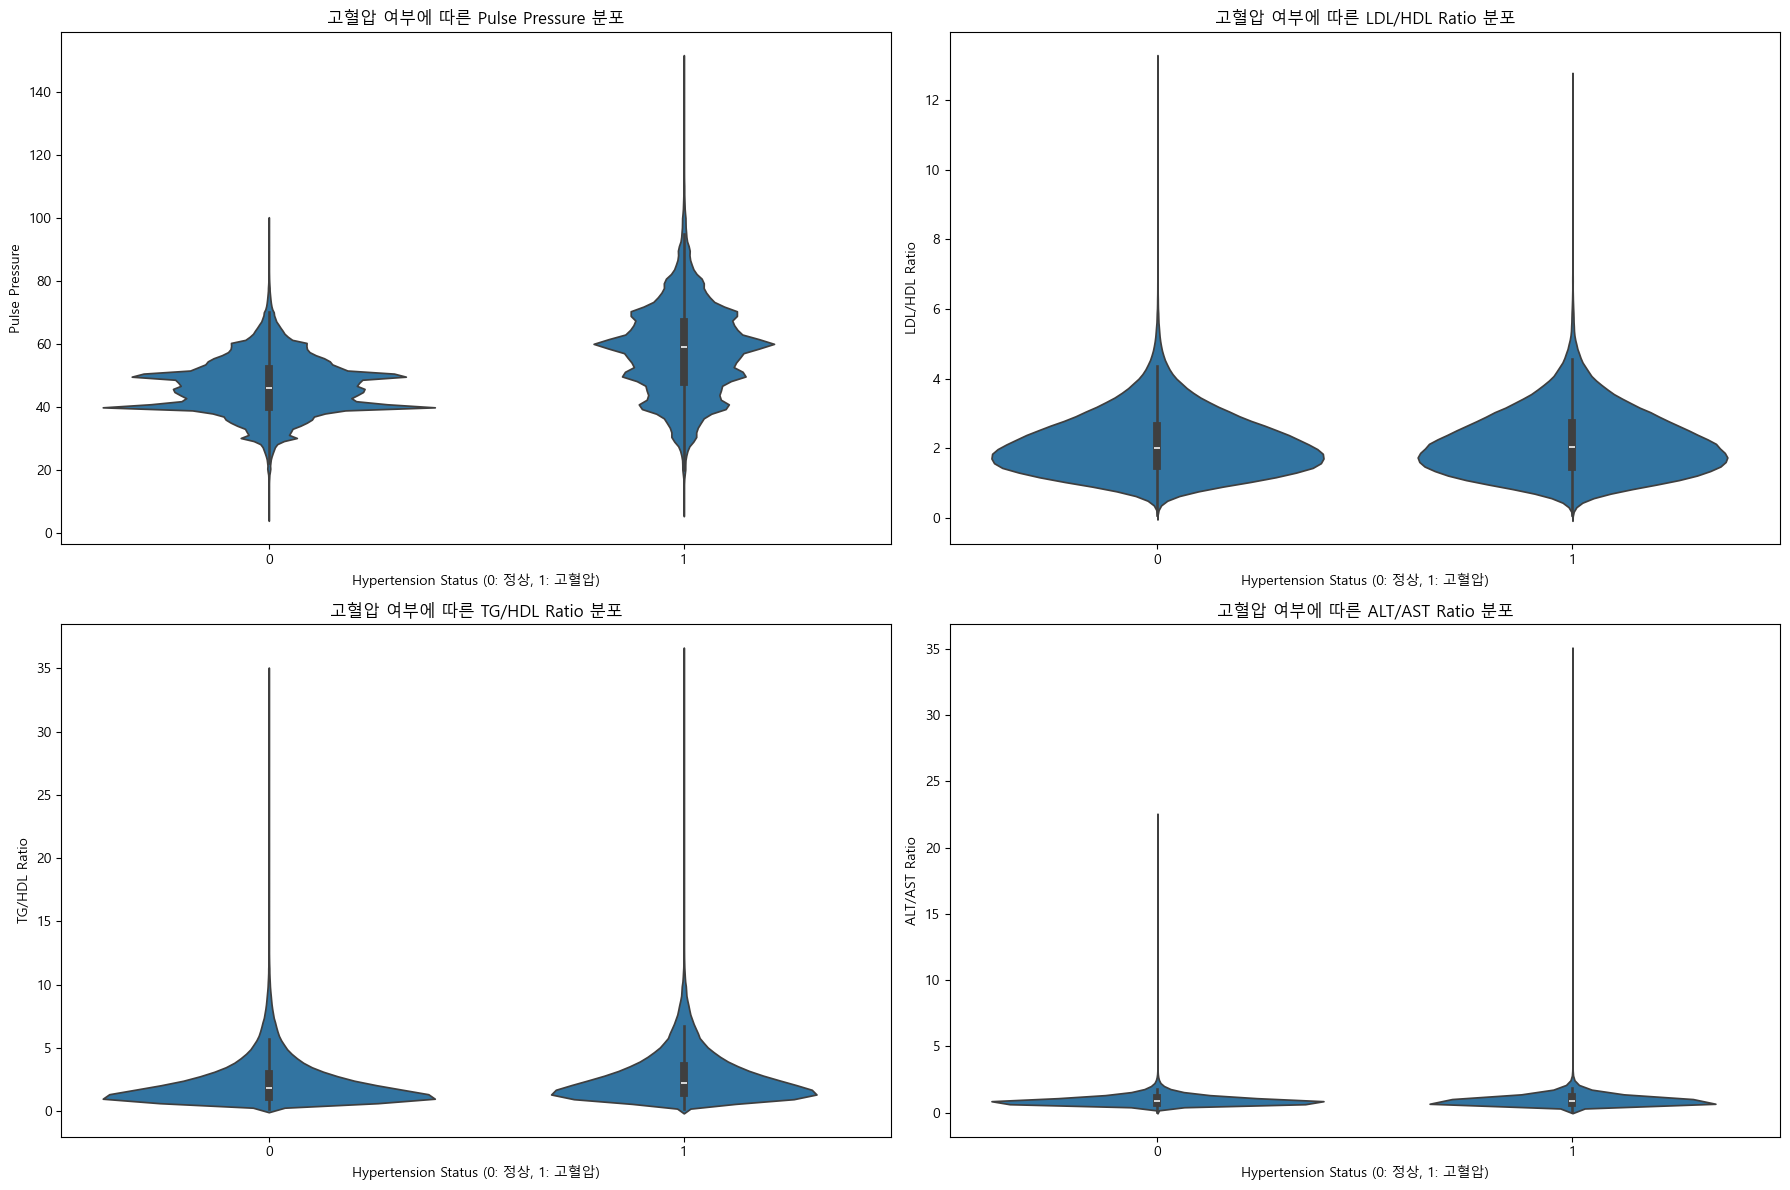

In [7]:
# 시각화할 변수 리스트
plot_features = ['pulse_pressure', 'ldl_hdl_ratio', 'tg_hdl_ratio', 'alt_ast_ratio']
titles = ['Pulse Pressure', 'LDL/HDL Ratio', 'TG/HDL Ratio', 'ALT/AST Ratio']

plt.figure(figsize=(18, 12))

for i, feature in enumerate(plot_features):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x='hypertension_status', y=feature, data=df, inner='box')
    plt.title(f"고혈압 여부에 따른 {titles[i]} 분포")
    plt.xlabel("Hypertension Status (0: 정상, 1: 고혈압)")
    plt.ylabel(titles[i])

plt.tight_layout()
plt.show()

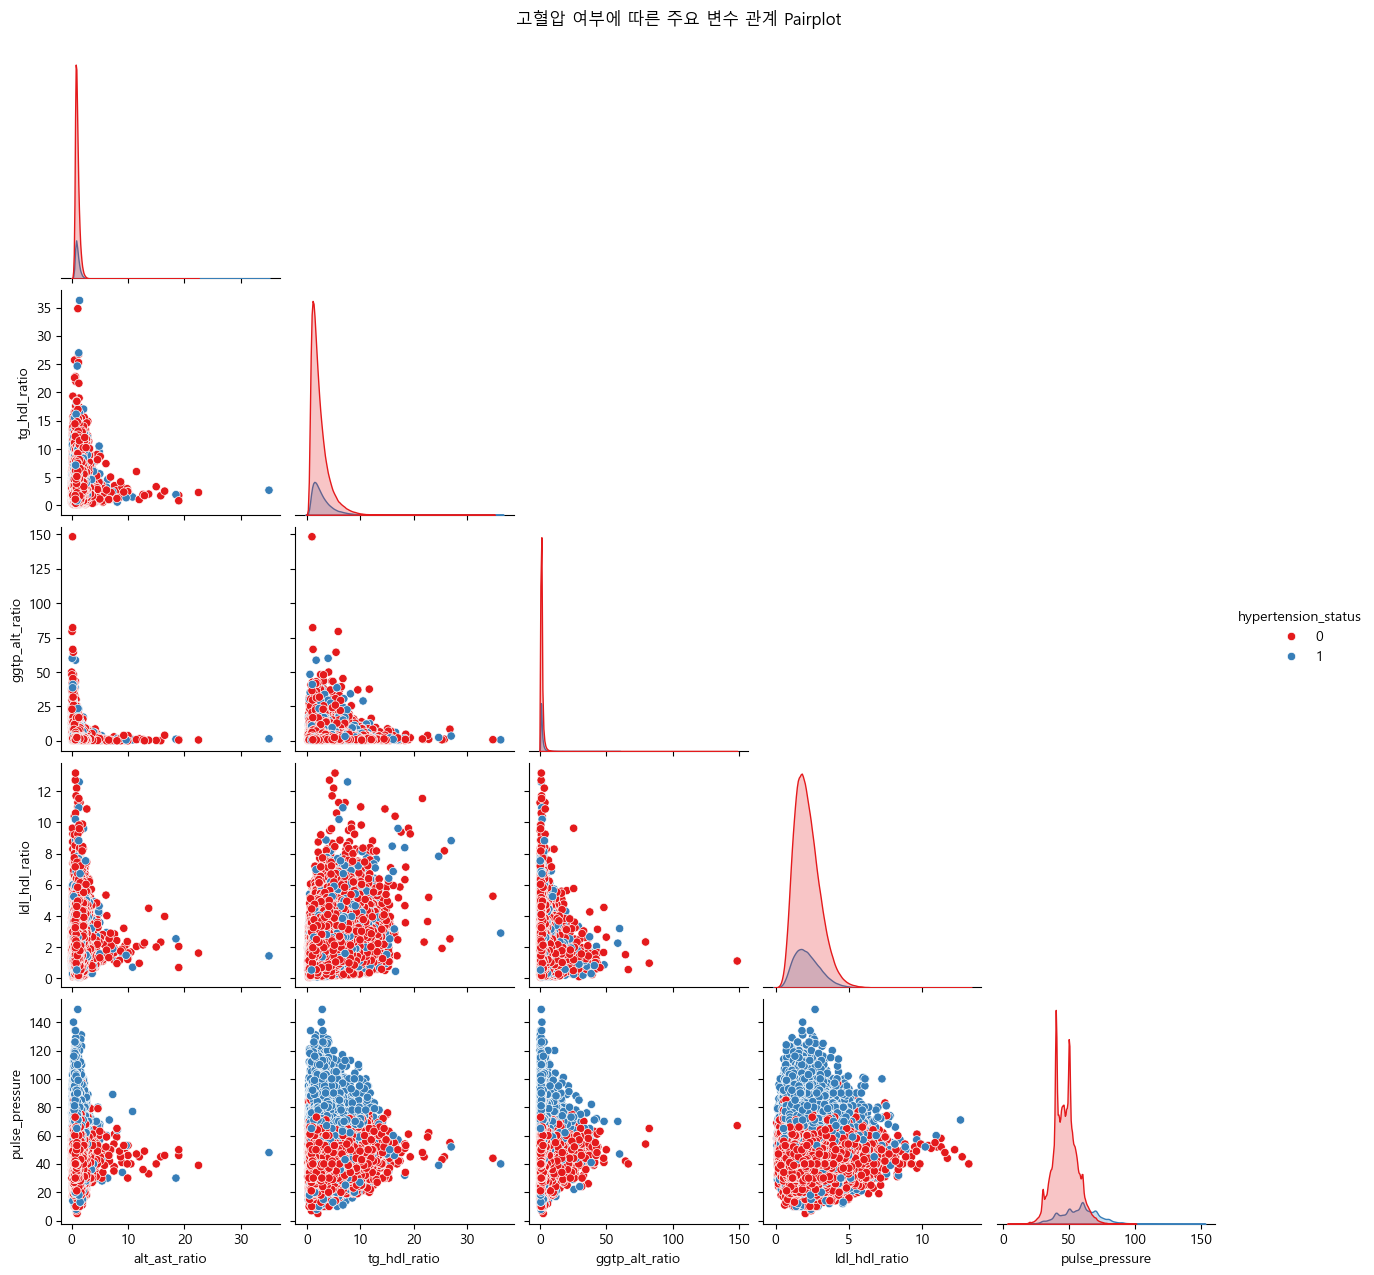

In [8]:
# 주요 피처 리스트 (선택형: 분석 핵심 변수 중심)
pair_features = [
    'alt_ast_ratio',
    'tg_hdl_ratio',
    'ggtp_alt_ratio',
    'ldl_hdl_ratio',
    'pulse_pressure',
    'hypertension_status'
]

# 시각화
sns.pairplot(df[pair_features], hue='hypertension_status', palette='Set1', corner=True)
plt.suptitle("고혈압 여부에 따른 주요 변수 관계 Pairplot", y=1.02)
plt.show()

EDA 시각화 결과, BMI, pulse_pressure, TG/HDL 비율, 식전혈당, 연령대 등이  
고혈압 여부에 따라 분포 차이가 뚜렷하게 나타나는 변수로 확인되었으며,  
이는 해당 피처들이 예측 모델에서 주요 설명변수로 활용될 수 있음을 시사

반면 청력, 요단백, 성별코드 등은 고혈압 분포와의 차이가 미미하여  
모델에서 제거하거나 보조 변수로 활용하는 것이 타당한 것으로 판단
또한 일부 변수들 간에는 높은 상관성이 존재하여,  
다중공선성 해소를 위한 변수 선택이 필요함을 확인

In [10]:
def plot_ratio_feature_analysis(df, col, target='hypertension_status', bins=None):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # 1. Histogram
    sns.histplot(df[col], bins=40, ax=axes[0], color='skyblue', kde=False)
    axes[0].set_title(f"{col} Histogram")

    # 2. KDE Plot (타겟별 밀도)
    sns.kdeplot(data=df[df[target]==0], x=col, label='정상', ax=axes[1], fill=True)
    sns.kdeplot(data=df[df[target]==1], x=col, label='고혈압', ax=axes[1], fill=True)
    axes[1].set_title(f"{col} 분포 밀도곡선")
    axes[1].legend()

    # 3. Bin → Barplot (고혈압 비율)
    bin_label = f"{col}_bin"
    df[bin_label] = pd.cut(df[col], bins=bins)
    bin_group = df.groupby(bin_label)[target].mean()
    bin_group.plot(kind='bar', ax=axes[2], title=f"{col} 구간별 고혈압 비율")
    axes[2].set_ylabel("고혈압 비율")

    plt.tight_layout()
    plt.show()

In [11]:
ratio_features = [
     'alt_ast_ratio',
    'tg_hdl_ratio',
    'ggtp_alt_ratio',
    'ldl_hdl_ratio'
]

In [12]:
bin_dict = {
    'alt_ast_ratio': [0, 0.7, 0.9, 1.1, 1.5, 3, 10],
    'tg_hdl_ratio':  [0, 1, 2, 3, 4, 5, 10],
    'ggtp_alt_ratio': [0, 0.8, 1.2, 2, 5, 10, 150],
    'ldl_hdl_ratio': [0, 1, 1.5, 2, 2.5, 3, 5, 10]
}

C:\Users\asia\AppData\Local\Temp\ipykernel_27932\1237547272.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_group = df.groupby(bin_label)[target].mean()


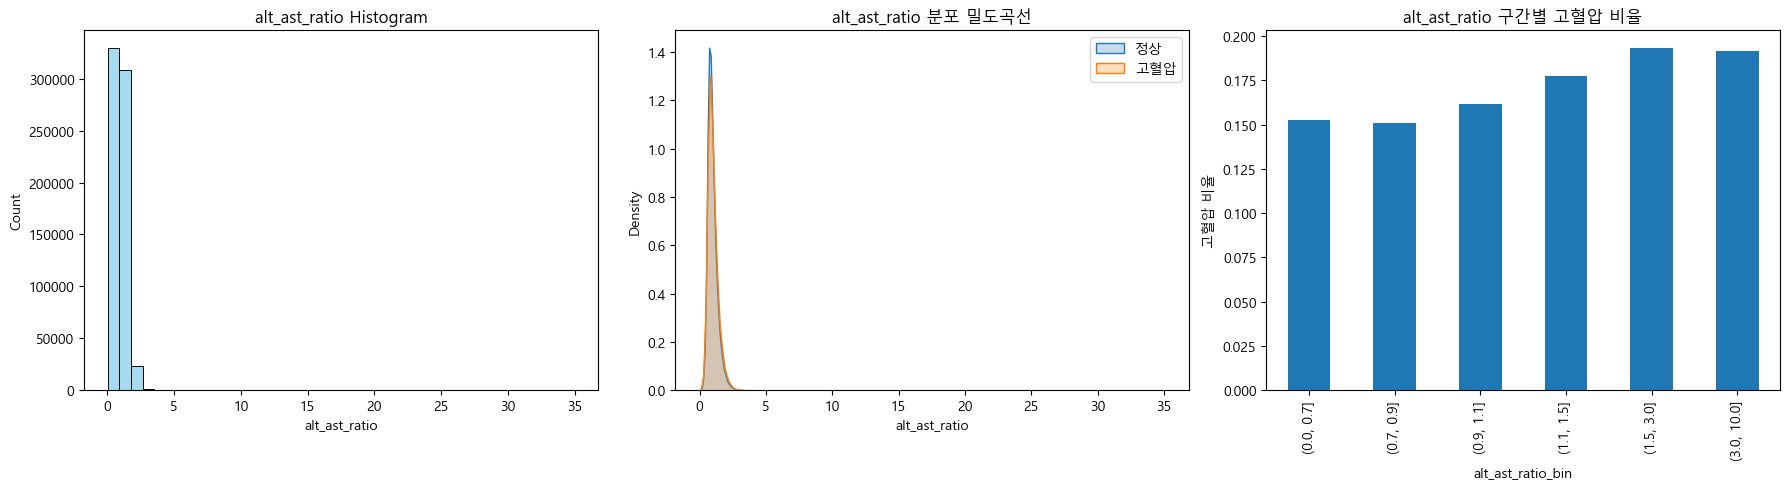

C:\Users\asia\AppData\Local\Temp\ipykernel_27932\1237547272.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_group = df.groupby(bin_label)[target].mean()


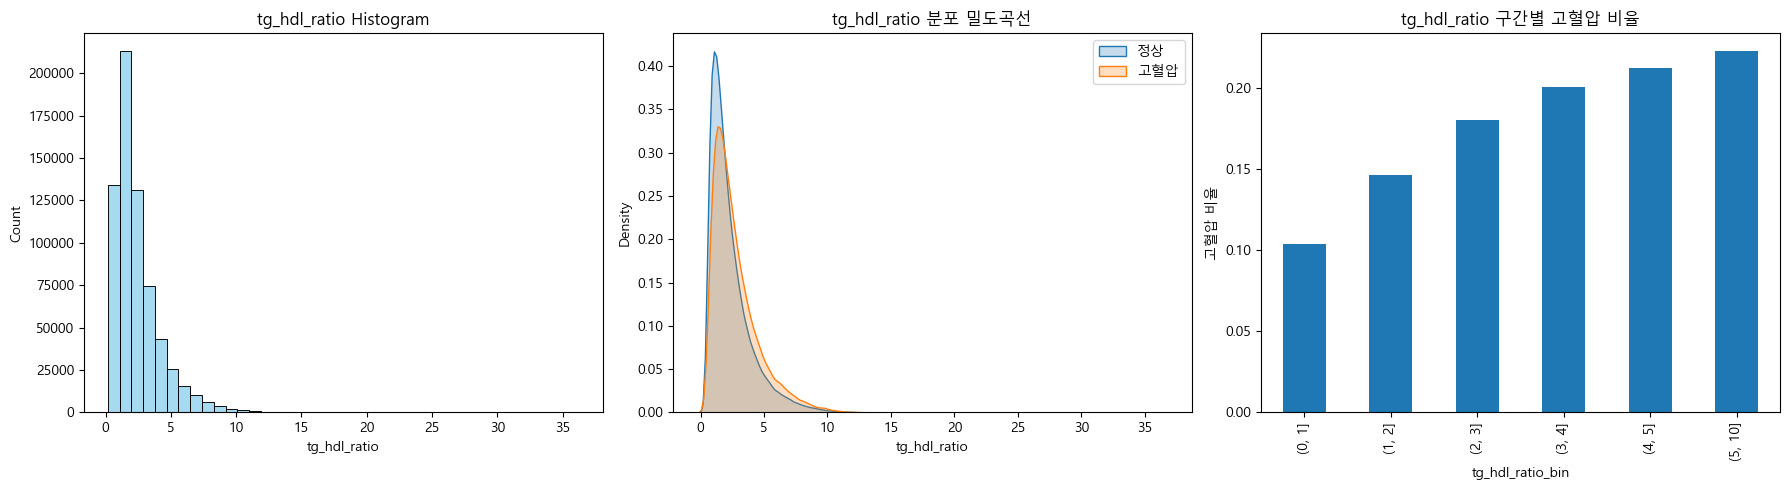

C:\Users\asia\AppData\Local\Temp\ipykernel_27932\1237547272.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_group = df.groupby(bin_label)[target].mean()


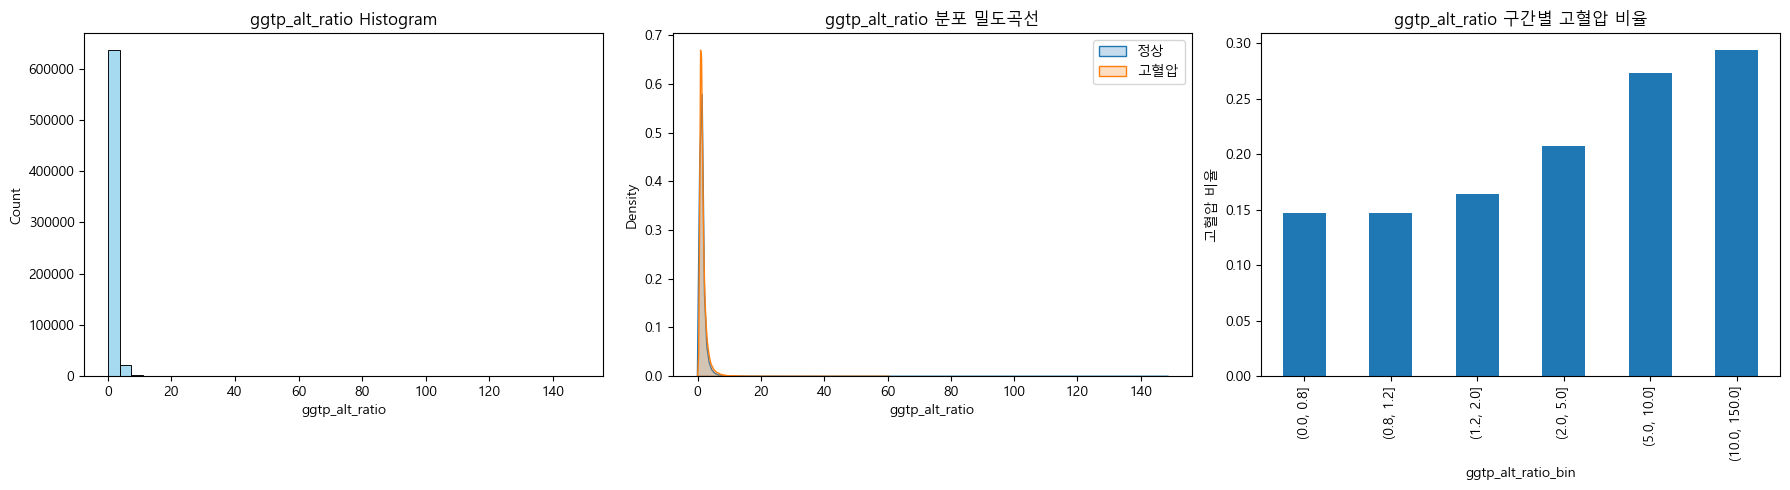

C:\Users\asia\AppData\Local\Temp\ipykernel_27932\1237547272.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_group = df.groupby(bin_label)[target].mean()


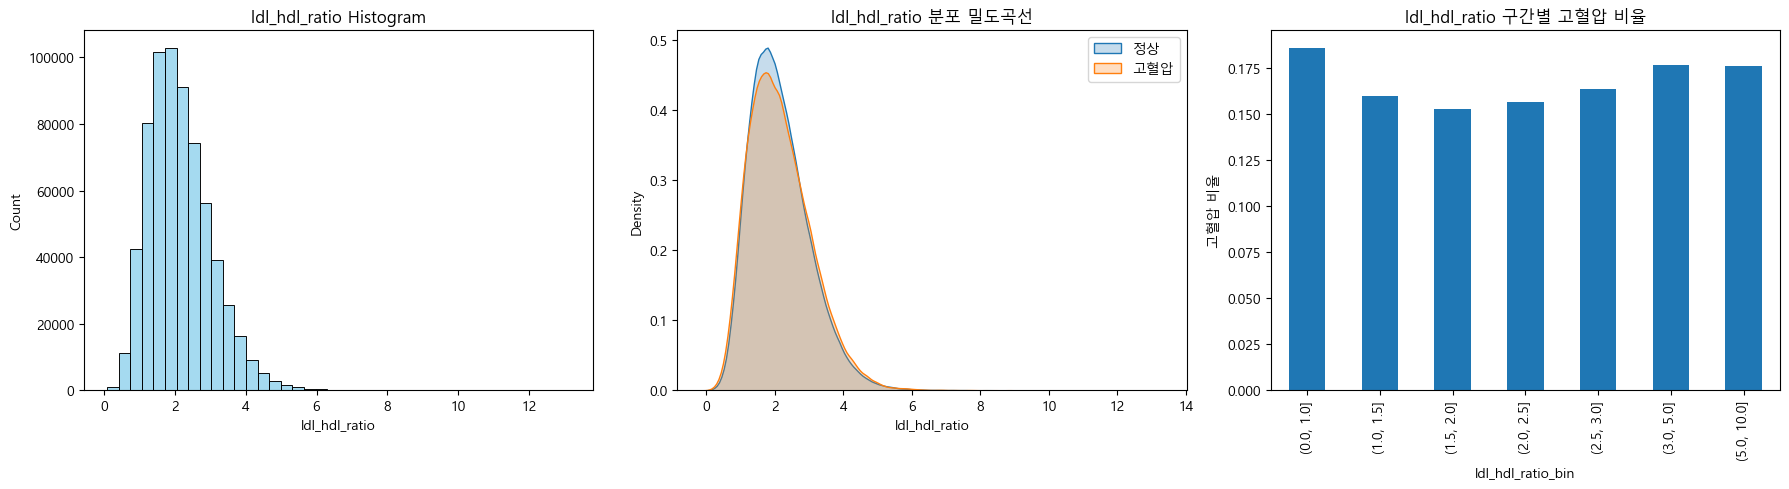

In [13]:
for col in ratio_features:
    plot_ratio_feature_analysis(df.copy(), col, bins=bin_dict[col])

### 1. `tg_hdl_ratio` (중성지방 / HDL 콜레스테롤)

#### 그래프 기반 분석 결과
- **Histogram**: 대부분 0~5 사이에 집중된 분포, 긴 우측 꼬리 존재
- **KDE**: 고혈압군 분포가 정상군보다 오른쪽으로 이동 → 평균적으로 높은 비율
- **Bin별 고혈압 비율**:
  - 0~1 → 약 10%
  - 1~2 → 14%
  - 2~3 → 17%
  - 4~5 → 21%
  - 5~10 → 22% 이상
- **패턴**: 비율이 증가할수록 고혈압 비율이 선형적으로 상승

#### 논리적 근거
- TG/HDL Ratio는 대사증후군, 인슐린 저항성, 심혈관 질환의 지표로 잘 알려져 있음
- 중성지방 증가와 HDL 감소는 고혈압의 간접적 위험 요인
- 문헌 및 임상에서도 TG/HDL 비율이 높을수록 심혈관계 질환 위험이 증가한다고 보고됨

> **모델의 핵심 피처로 사용 가치가 높음**

### 2. `alt_ast_ratio` (ALT / AST)

#### 그래프 기반 분석 결과
- **Histogram**: 대부분 0.7~1.5 범위에 밀집된 안정적 분포
- **KDE**: 고혈압군과 정상군 간의 분포 차이가 약하지만 존재 (고혈압자가 조금 더 높음)
- **Bin별 고혈압 비율**:
  - 0.7 이하 → 약 15%
  - 0.9~1.1 → 약 17%
  - 1.5~3 → 약 19%
- **패턴**: 비율이 증가함에 따라 고혈압 비율이 완만하게 상승

#### 논리적 근거
- ALT/AST 비율은 간 기능 이상 또는 지방간 의심 지표
- 간 기능 저하 또는 지방간은 대사질환과 관련이 있으며, 고혈압과 함께 나타나는 경우가 많음
- 직접적인 고혈압 인자보다는 간접적인 건강 상태 반영

> **단독보다는 보조 지표로서 활용할 수 있음**

### 3. `ggtp_alt_ratio` (GGT / ALT)

#### 그래프 기반 분석 결과
- **Histogram**: 대부분 0~5에 몰려 있으며, 최대 150 이상의 극단값 존재
- **KDE**: 고혈압자의 분포가 더 넓고, 꼬리가 더 길게 퍼짐
- **Bin별 고혈압 비율**:
  - 0.8 이하 → 15%
  - 2~5 → 20%
  - 10~150 → 30% 근접
- **패턴**: 비율이 일정 수준 이상부터 급격히 상승

#### 논리적 근거
- GGT는 간 해독 효소, ALT는 간 손상 관련  
→ 이들의 비율은 간 해독 부담 또는 지방간·음주성 간질환 반영
- GGT/ALT 비율이 높은 경우, 대사증후군·고혈압 등과의 연관성 높음

> **고위험군 식별 가능 → 로그변환 또는 구간화하여 사용 추천**

### 4. `ldl_hdl_ratio` (LDL / HDL)

#### 그래프 기반 분석 결과
- **Histogram**: 정규분포 형태에 가까움 (1~3 사이에 분포 집중)
- **KDE**: 고혈압/정상군 간 분포가 거의 겹침
- **Bin별 고혈압 비율**:
  - 0~1 → 18.5%
  - 1.5~2.5 → 16%
  - 3~5 → 18%
- **패턴**: 비율과 고혈압 간의 관계가 불규칙하고 일관되지 않음

#### 논리적 근거
- LDL/HDL 비율은 심혈관계 위험도 예측에는 유용
- 하지만 고혈압과의 직접적 연관성은 낮고, 예측 모델에서 분리력도 약함
- 데이터에서 고혈압 비율이 특정 구간에서 오히려 감소하는 등 비선형적, 불안정한 경향

# 데이터 상관분석

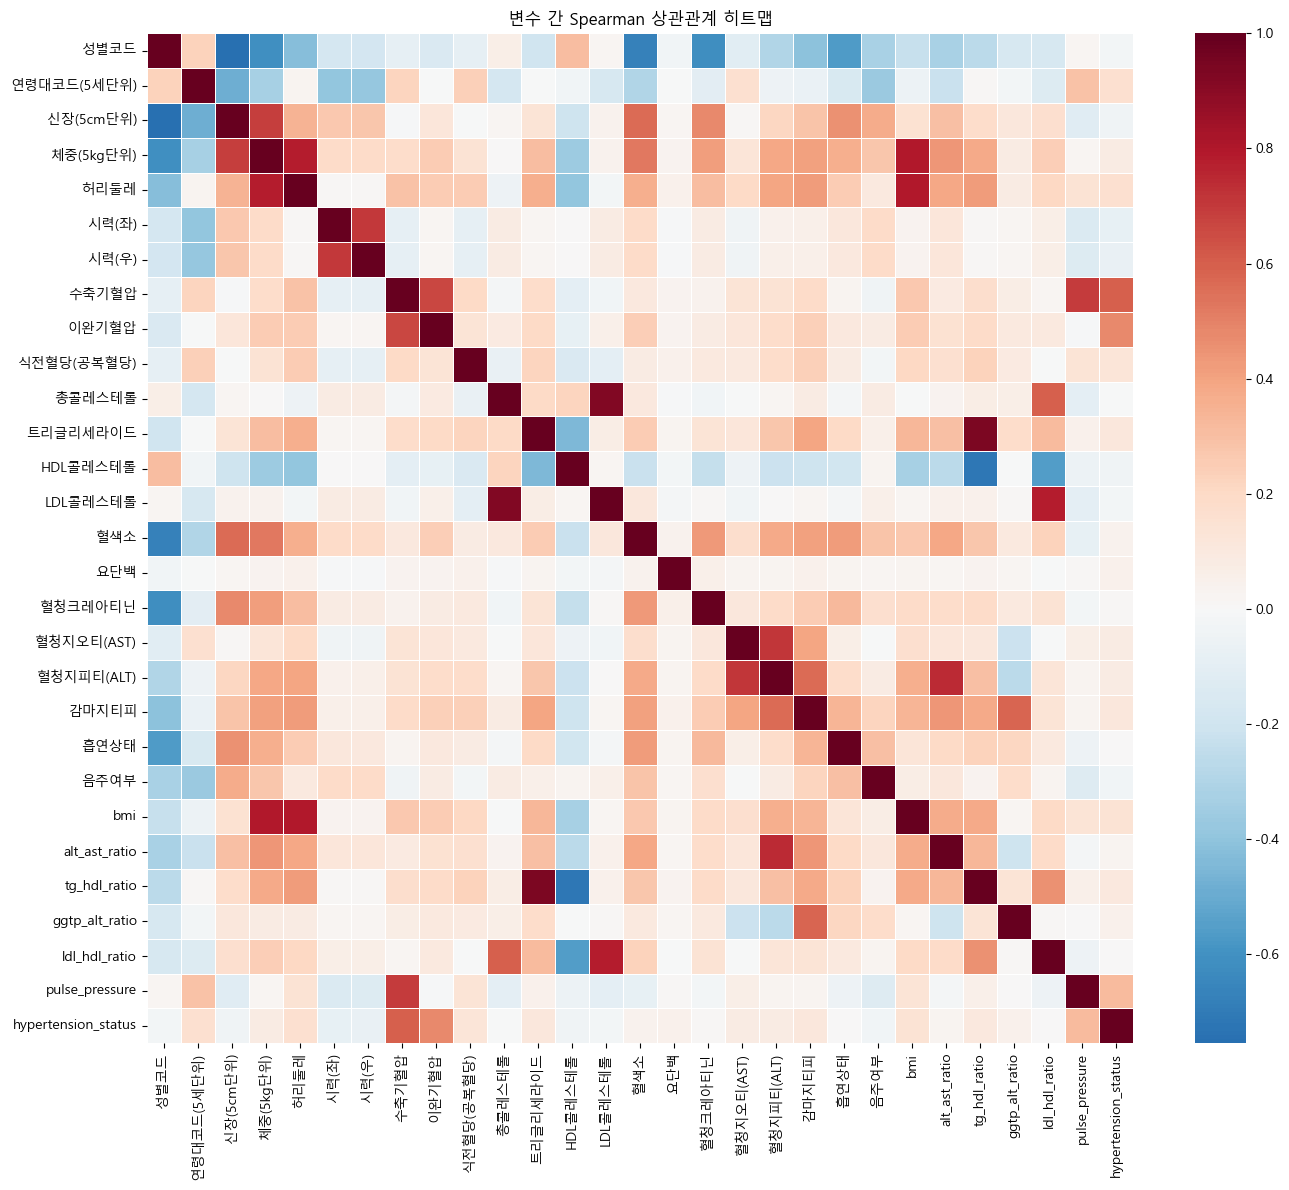

In [18]:
corr_matrix = df.corr(method='spearman', numeric_only=True)

# 히트맵 시각화
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=False, cmap='RdBu_r', center=0, linewidths=0.5)
plt.title("변수 간 Spearman 상관관계 히트맵")
plt.tight_layout()
plt.show()

## Spearman 상관계수 사용 이유

건강검진 데이터의 특성과 분석 목적에 따라, 본 프로젝트에서는 변수 간 상관관계 분석 시 **Spearman 순위 상관계수**를 사용하였습니다.

### 선택 이유

1. **비정규 분포 변수 다수**
   - 건강검진 데이터는 혈압, 콜레스테롤, 체중 등 **왜도(skewness)**가 큰 변수들이 많아 정규성을 만족하지 않음
   - `Pearson` 상관계수는 **정규성 + 선형성 가정**이 필요함 → 왜곡된 결과 가능성
   - `Spearman`은 **순위 기반 비모수 방식**으로 정규성 필요 없음

2. **비선형(단조) 관계 반영 가능**
   - 의료 지표는 일정 기준 이상에서 급격히 위험도가 증가하는 **비선형/단조 관계**가 많음  
     예: HDL이 40 미만일 때 심혈관 질환 위험 급증
   - Spearman은 **단조(monotonic) 관계**까지 포착 가능

3. **이상치에 강건함**
   - 건강검진 데이터는 극단값(outlier)이 포함될 가능성이 높음
   - Spearman은 **절대값이 아닌 순위(rank) 기반**으로 이상치에 민감하지 않음

4. **의료 연구에서 보편적 사용**
   - 실제 의료 논문 및 보건 통계 분석에서도 Spearman이 널리 활용됨
   - 다양한 변수 분포 상황에서도 **해석 가능성과 실무 적용성이 높음**

## 상관계수 0.6 이상 기준 설정 이유

- 일반적으로 **0.6 이상의 상관계수는 "중간 이상의 관계"**로 해석되며, 변수 간 연관성을 파악하기에 적절한 기준
- 특히 머신러닝 모델에서는 **다중공선성(Multicollinearity)** 문제를 방지하기 위해 상관성이 높은 변수쌍을 탐색하는 것이 중요
- 건강검진 데이터는 서로 연관된 지표가 많기 때문에, **0.6 이상으로 기준을 설정함으로써 의미 있는 변수쌍만을 선별**

In [35]:
features = [
    '성별코드', 
    '연령대코드(5세단위)', 
    '시력(평균)',
    '식전혈당(공복혈당)', 
    '총콜레스테롤', 
    '트리글리세라이드',
    'HDL콜레스테롤', 
    'LDL콜레스테롤', 
    '혈색소', 
    '요단백', 
    '혈청크레아티닌', 
    '혈청지오티(AST)',
    '혈청지피티(ALT)', 
    '감마지티피', 
    '흡연상태', 
    '음주여부', 
    'bmi', 
    'alt_ast_ratio',
    'tg_hdl_ratio', 
    'ggtp_alt_ratio', 
    'ldl_hdl_ratio', 
    'pulse_pressure',
    'hypertension_status'
]

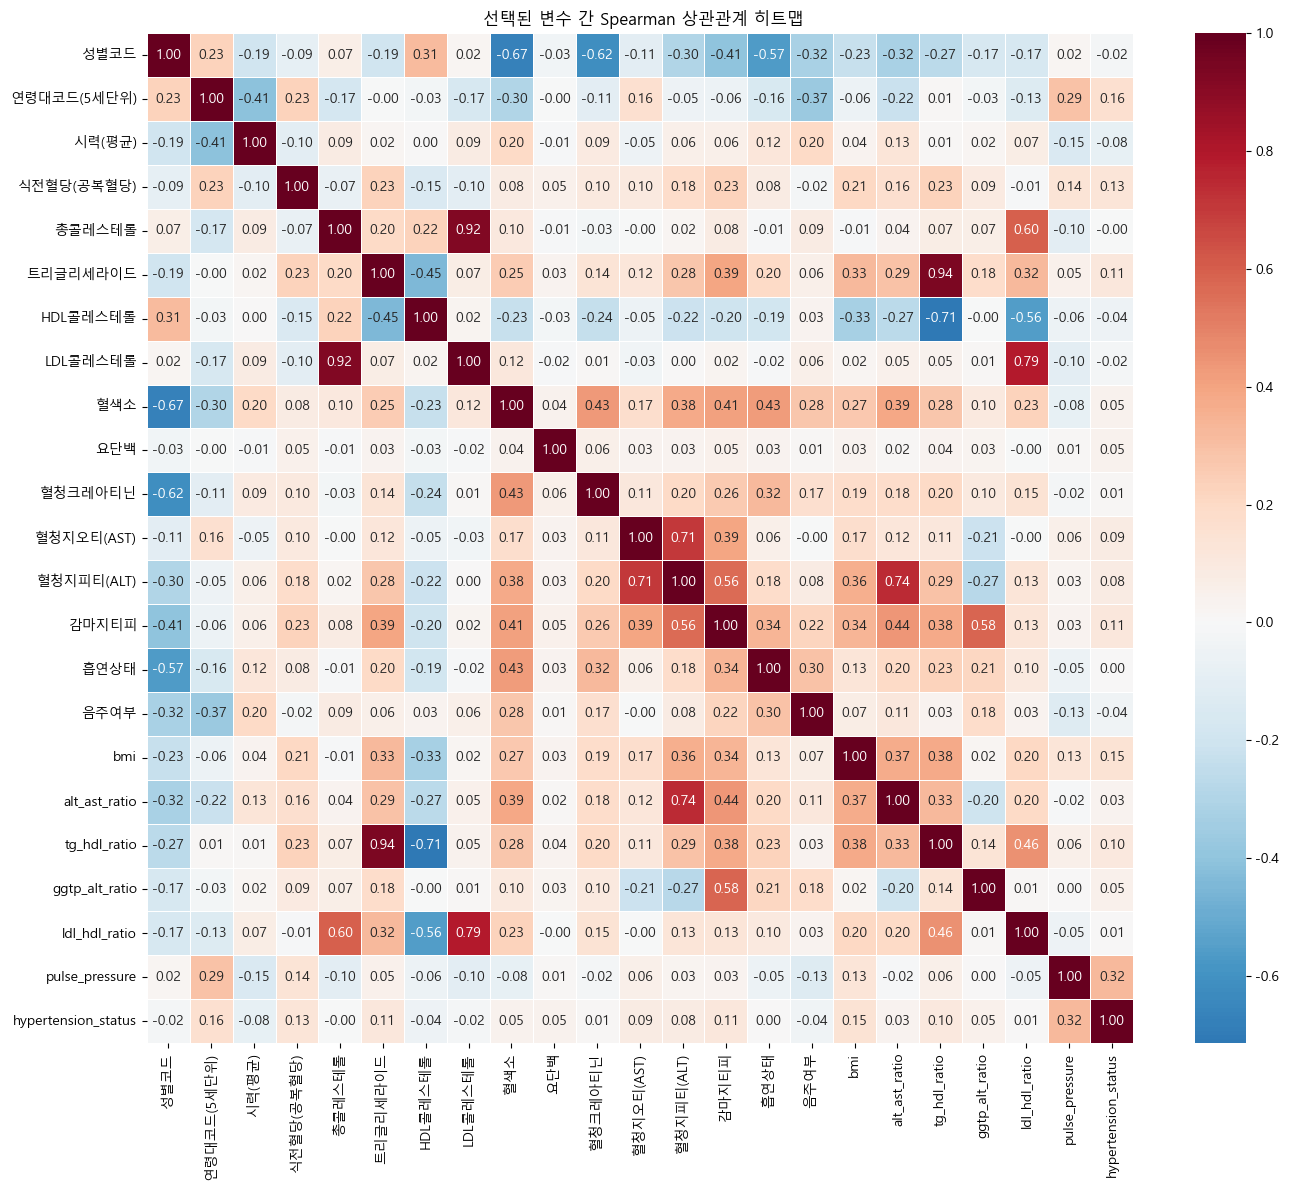

In [36]:
# features만 포함된 서브셋 생성
df_selected = df[features]

# Spearman 상관계수 행렬 계산
corr_selected = df_selected.corr(method='spearman')

# 히트맵 시각화
plt.figure(figsize=(14, 12))
sns.heatmap(corr_selected, annot=True, fmt=".2f", cmap='RdBu_r', center=0, linewidths=0.5)
plt.title(" 선택된 변수 간 Spearman 상관관계 히트맵")
plt.tight_layout()
plt.show()

In [37]:
# 상관계수 절댓값이 높은 변수쌍 필터링 함수
def get_high_corr_pairs(corr_matrix, threshold=0.6):
    corr_pairs = (
        corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        .stack()
        .reset_index()
    )
    corr_pairs.columns = ['var1', 'var2', 'correlation']
    high_corr = corr_pairs[abs(corr_pairs['correlation']) > threshold]
    return high_corr.sort_values(by='correlation', ascending=False)

# 적용
high_corr_features = get_high_corr_pairs(corr_selected, threshold=0.6)
print(" 상관계수 0.6 이상 변수쌍:")
print(high_corr_features)

 상관계수 0.6 이상 변수쌍:
           var1           var2  correlation
112    트리글리세라이드   tg_hdl_ratio     0.938943
84       총콜레스테롤       LDL콜레스테롤     0.920790
145    LDL콜레스테롤  ldl_hdl_ratio     0.786161
202  혈청지피티(ALT)  alt_ast_ratio     0.743502
187  혈청지오티(AST)     혈청지피티(ALT)     0.708640
9          성별코드        혈청크레아티닌    -0.618413
7          성별코드            혈색소    -0.673026
128    HDL콜레스테롤   tg_hdl_ratio    -0.714391


In [38]:
features = [
    '성별코드', 
    '연령대코드(5세단위)', 
    '시력(평균)',
    '식전혈당(공복혈당)', 
    '총콜레스테롤', 
    '혈색소', 
    '요단백', 
    '혈청크레아티닌',  
    '감마지티피', 
    '흡연상태', 
    '음주여부', 
    'bmi', 
    'alt_ast_ratio',
    'tg_hdl_ratio', 
    'ggtp_alt_ratio', 
    'ldl_hdl_ratio', 
    'pulse_pressure',
    'hypertension_status'
]

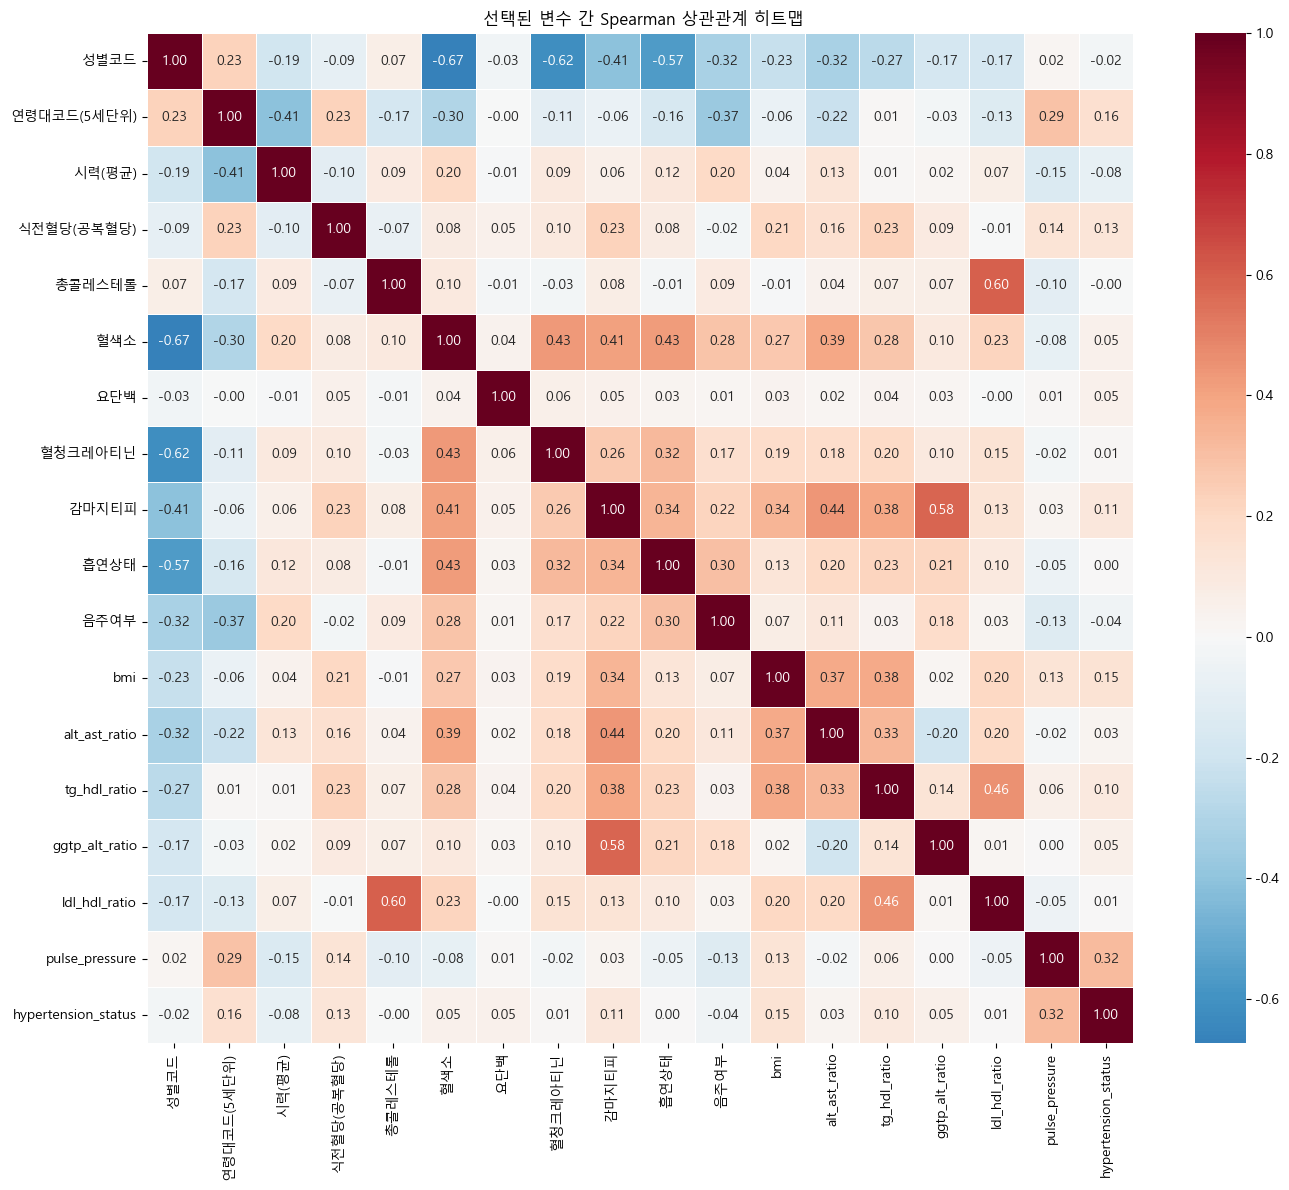

In [39]:
# features만 포함된 서브셋 생성
df_selected = df[features]

# Spearman 상관계수 행렬 계산
corr_selected = df_selected.corr(method='spearman')

# 히트맵 시각화
plt.figure(figsize=(14, 12))
sns.heatmap(corr_selected, annot=True, fmt=".2f", cmap='RdBu_r', center=0, linewidths=0.5)
plt.title(" 선택된 변수 간 Spearman 상관관계 히트맵")
plt.tight_layout()
plt.show()

In [40]:
# 상관계수 절댓값이 높은 변수쌍 필터링 함수
def get_high_corr_pairs(corr_matrix, threshold=0.6):
    corr_pairs = (
        corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        .stack()
        .reset_index()
    )
    corr_pairs.columns = ['var1', 'var2', 'correlation']
    high_corr = corr_pairs[abs(corr_pairs['correlation']) > threshold]
    return high_corr.sort_values(by='correlation', ascending=False)

# 적용
high_corr_features = get_high_corr_pairs(corr_selected, threshold=0.6)
print(" 상관계수 0.6 이상 변수쌍:")
print(high_corr_features)

 상관계수 0.6 이상 변수쌍:
   var1     var2  correlation
6  성별코드  혈청크레아티닌    -0.618413
4  성별코드      혈색소    -0.673026


In [28]:
df['시력(평균)'] = df[['시력(좌)', '시력(우)']].mean(axis=1)

# 기존 컬럼 삭제 (선택)
df.drop(['시력(좌)', '시력(우)'], axis=1, inplace=True)

In [42]:
df.to_csv('../data/processed/health_checkup_vision_processed.csv', index=False, encoding='utf-8-sig')

In [41]:
features = [
    '성별코드', 
    '연령대코드(5세단위)', 
    '시력(평균)',
    '식전혈당(공복혈당)', 
    '총콜레스테롤', 
    '혈색소', 
    '요단백', 
    '혈청크레아티닌',  
    '감마지티피', 
    '흡연상태', 
    '음주여부', 
    'bmi', 
    'alt_ast_ratio',
    'tg_hdl_ratio', 
    'ggtp_alt_ratio', 
    'ldl_hdl_ratio', 
    'pulse_pressure',
    'hypertension_status'
]

## 변수 간 상관관계를 통한 피처 정제

본 프로젝트에서는 고혈압 예측을 위한 데이터 전처리 과정에서,  
모델 입력 변수 간의 **중복성 제거 및 정보 요약**을 목적으로  
**전체 변수 간의 Spearman 상관계수 기반 분석**을 수행하였다.

### 분석 목적

- **전체 컬럼 간 상관관계**를 분석하여, **의미 중복 또는 파생 관계가 높은 피처쌍을 식별**
- 정보가 중복되거나 계산식상 포함되는 변수를 제거 또는 통합하여 **모델의 효율성과 해석력을 높이기 위함**

---

### 주요 정제 기준

| 기준 | 설명 |
|------|------|
| **상관계수 |r| > 0.6 이상** | 강한 다중공선성으로 간주하여 하나만 남김 |
| **의료적 해석이 불가능한 중복 변수** | 파생 변수로 통합하거나 제거 |
| **분석 목적이 명확한 경우 예외적 유지** | 상관계수가 낮더라도 생활습관이나 임상적 맥락 고려해 유지 가능 |

---

### 피처 정제 예시

| 제거 또는 통합된 변수쌍 | 이유 |
|------------------------|------|
| `AST`, `ALT` → `alt_ast_ratio` | 간 효소 유사 관계, 비율로 통합 |
| `HDL콜레스테롤`, `트리글리세라이드` → `tg_hdl_ratio` | ratio 계산에 포함된 피처 제거 |
| `감마지티피'` → `ggtp_alt_ratio` | 높은 중복성 → 해석 가능한 LDL 유지 |
| `LDL콜레스테롤`, `HDL콜레스테롤` → `ldl_hdl_ratio` | 높은 중복성 → 해석 가능한 LDL 유지 | 
| `시력(좌)`, `시력(우)` → `시력(평균)` | 좌우 시력 통합 |

# 다중공선성 확인

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

X = df[features].drop(columns=['hypertension_status'])

# 2. 더미변수 변환 (범주형: 성별, 흡연, 음주 등)
X_encoded = pd.get_dummies(X, drop_first=True)

# 3. 상수항 추가
X_encoded = add_constant(X_encoded)

# 4. VIF 계산
vif_df = pd.DataFrame()
vif_df['feature'] = X_encoded.columns
vif_df['VIF'] = [variance_inflation_factor(X_encoded.values, i) for i in range(X_encoded.shape[1])]

# 5. 결과 출력
print(vif_df.sort_values(by='VIF', ascending=False))

           feature         VIF
0            const  383.788224
1             성별코드    2.699585
9            감마지티피    2.466032
15  ggtp_alt_ratio    2.322304
16   ldl_hdl_ratio    2.147896
6              혈색소    1.881596
5           총콜레스테롤    1.872646
13   alt_ast_ratio    1.665357
2      연령대코드(5세단위)    1.483683
10            흡연상태    1.482893
14    tg_hdl_ratio    1.480149
8          혈청크레아티닌    1.432281
11            음주여부    1.299492
12             bmi    1.293029
17  pulse_pressure    1.149919
4       식전혈당(공복혈당)    1.148298
3           시력(평균)    1.051512
7              요단백    1.032380


## 다중공선성 점검 (VIF 분석)

모델 입력 변수 간의 다중공선성 여부를 확인하기 위해  
`Variance Inflation Factor (VIF)` 분석을 수행하였습니다.

### 분석 기준

- **VIF > 10**: 다중공선성 심각 → 제거 필요
- **VIF 5~10**: 다중공선성 주의 → 상황에 따라 제거 고려
- **VIF < 5**: 문제 없음 → 그대로 유지 가능

### 분석 결과 요약

- 상수항(const)을 제외한 모든 피처의 VIF가 **5 미만**으로 나타났으며,
- **다중공선성 문제는 없음**으로 판단됨
- 따라서 현재 피처 구성은 **선형 모델 및 트리 기반 모델 모두에 안정적으로 적용 가능**

### 참고

- `성별코드`, `감마지티피`, `ldl_hdl_ratio` 등의 일부 변수는 상대적으로 VIF가 높았지만,  
  **의미 있는 임상 지표이자 3 미만 범위**에 있으므로 그대로 유지함


C:\Users\asia\AppData\Local\Temp\ipykernel_27932\3552729012.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VIF', y='feature', data=vif_plot_df, palette='Blues_d')


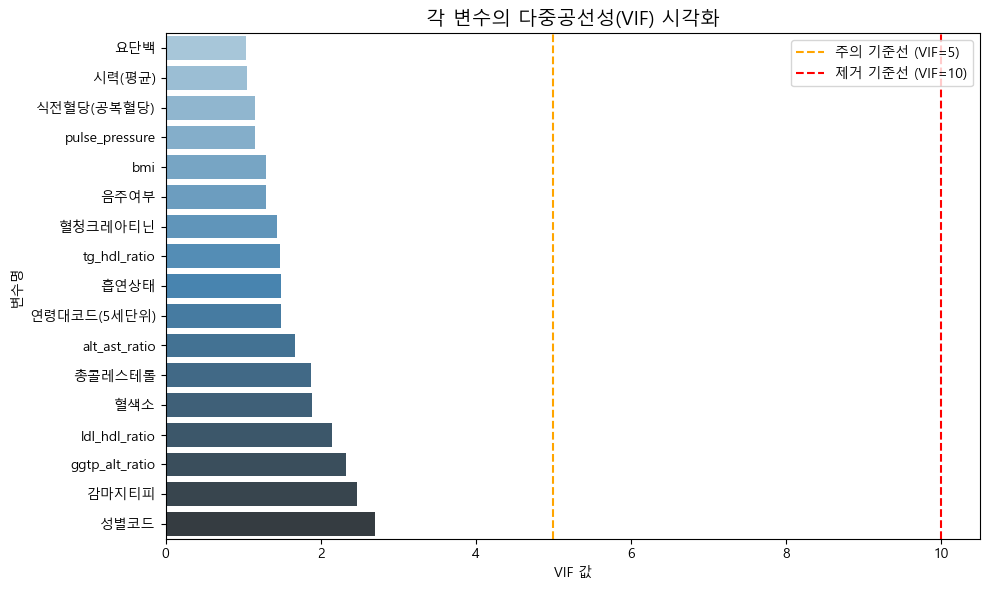

In [44]:
# 상수항 제외
vif_plot_df = vif_df[vif_df['feature'] != 'const'].sort_values(by='VIF', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='feature', data=vif_plot_df, palette='Blues_d')

plt.axvline(5, color='orange', linestyle='--', label='주의 기준선 (VIF=5)')
plt.axvline(10, color='red', linestyle='--', label='제거 기준선 (VIF=10)')

plt.title("각 변수의 다중공선성(VIF) 시각화", fontsize=14)
plt.xlabel("VIF 값")
plt.ylabel("변수명")
plt.legend()
plt.tight_layout()
plt.show()

In [45]:
# 타겟과의 상관계수 계산
corr_with_target = df[features].corr(method='spearman')['hypertension_status'].sort_values(ascending=False)

# 출력
print(corr_with_target)

hypertension_status    1.000000
pulse_pressure         0.318471
연령대코드(5세단위)            0.160143
bmi                    0.147087
식전혈당(공복혈당)             0.127822
감마지티피                  0.113074
tg_hdl_ratio           0.104114
ggtp_alt_ratio         0.053782
요단백                    0.048737
혈색소                    0.046497
alt_ast_ratio          0.031726
혈청크레아티닌                0.010734
ldl_hdl_ratio          0.005871
흡연상태                   0.003474
총콜레스테롤                -0.002908
성별코드                  -0.021959
음주여부                  -0.040776
시력(평균)                -0.079134
Name: hypertension_status, dtype: float64


C:\Users\asia\AppData\Local\Temp\ipykernel_27932\1616835867.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_target_df.values, y=corr_target_df.index, palette='coolwarm')
C:\Users\asia\AppData\Local\Temp\ipykernel_27932\1616835867.py:8: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\anaconda3\envs\py312tf2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


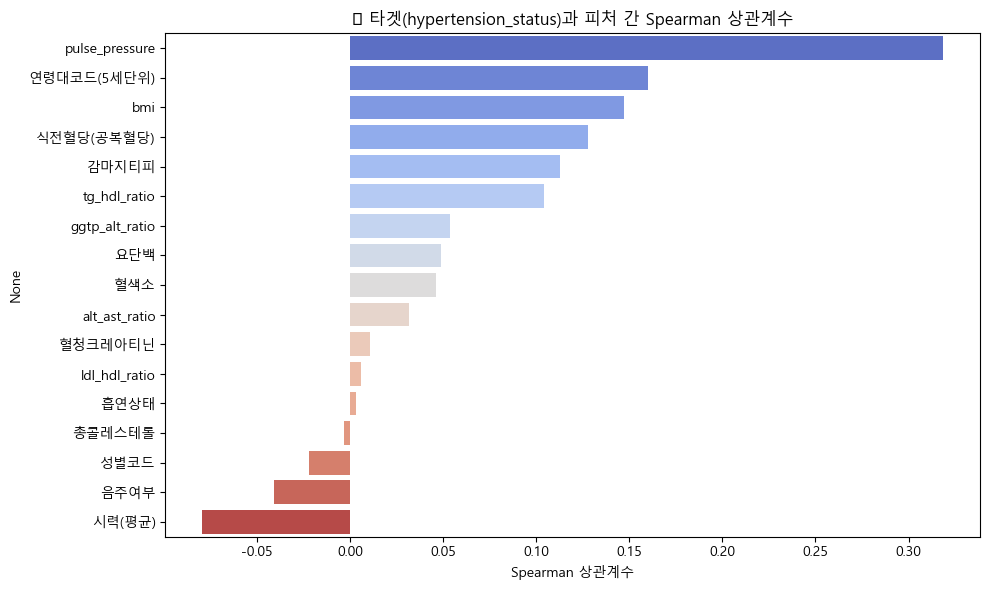

In [46]:
# 타겟과 상관계수 시각화
corr_target_df = corr_with_target.drop('hypertension_status')  # 자기 자신 제외

plt.figure(figsize=(10, 6))
sns.barplot(x=corr_target_df.values, y=corr_target_df.index, palette='coolwarm')
plt.title("🔍 타겟(hypertension_status)과 피처 간 Spearman 상관계수")
plt.xlabel("Spearman 상관계수")
plt.tight_layout()
plt.show()

## 타겟 변수(hypertension_status)와 피처 간 상관관계 분석

Spearman 상관계수를 통해 타겟 변수와 각 피처 간 관계를 분석한 결과,  
고혈압 여부와 밀접한 관계를 가지는 주요 변수는 다음과 같았습니다.

### 유의미한 양의 상관관계

| 변수명                | 상관계수 | 해석 요약 |
|-----------------------|----------|-----------|
| `pulse_pressure`      | 0.318    | 수축기-이완기 혈압 차이로 고혈압을 직접적으로 반영 |
| `연령대코드(5세단위)`   | 0.160    | 나이 증가와 함께 고혈압 위험 증가 |
| `bmi`                 | 0.147    | 비만도와 고혈압 간 상관관계 반영 |
| `공복혈당`             | 0.127    | 혈당 수치와 고혈압의 간접 연관 |
| `감마지티피`, `tg_hdl_ratio` | 0.1대 | 간 기능/지질 대사와의 약한 연관 |

### 상관계수 기준으로는 유의하지 않지만 모델에 포함 가능

- `흡연상태`, `음주여부`, `성별코드`, `총콜레스테롤`, `시력(평균)` 등은  
  단독 상관계수는 낮으나, **모델 내부에서 조합 또는 비선형 효과**로 중요할 수 있으므로 제외 대상은 아님

### 결론

- **상관계수는 선형/단조 관계만 파악할 수 있으므로**,  
  모델링 단계에서는 중요도(`feature importance`, `SHAP`) 분석을 통해  
  실제 영향력을 종합적으로 판단할 예정

In [50]:
features = [
    '성별코드',
    '연령대코드(5세단위)',
    '시력(평균)',
    '식전혈당(공복혈당)',
    '총콜레스테롤',
    '혈색소',
    '요단백',
    '혈청크레아티닌',
    '감마지티피',
    '흡연상태',
    '음주여부',
    'bmi',
    'alt_ast_ratio',
    'tg_hdl_ratio',
    'ggtp_alt_ratio',
    'ldl_hdl_ratio',
    'hypertension_status'  # 타겟
]

> `pulse_pressure`는 수축기 혈압과 이완기 혈압의 차이로 계산되는 지표로,  
> 고혈압 여부 판단에 직접 활용되는 핵심 기준 중 하나입니다.
> 본 프로젝트의 타겟 변수(`hypertension_status`) 또한 수축기 및 이완기 혈압 기준으로 정의되므로,  
> `pulse_pressure`를 입력 변수로 사용할 경우 **정보 누수(leakage)** 및 **성능 과대평가** 가능성이 존재합니다.
> 이에 따라 본 모델에서는 해당 변수를 제외

In [51]:
# 사용할 피처만 추출
df_selected = df[features]

# CSV로 저장
df_selected.to_csv("../data/processed/health_checkup_selected_features.csv", index=False, encoding='utf-8-sig')